# Měření odporů

In [9]:
from protokol import *
from uncertainties import ufloat
from uncertainties.unumpy import nominal_values as noms
from uncertainties.unumpy import std_devs as stds
import uncertainties.umath as um

In [48]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (4*1.5,2.5*1.5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["text.latex.preamble"] = r"""
\usepackage[decimalsymbol=comma]{siunitx}
"""

### Definice

chyba dekády: 0,1% z naměřené hodnoty

chyba amp/voltmetru: 0,2% z rozsahu

chyba multimetru pro voltmetr: 0,8% $\pm$ 2d

chyba multimetru pro ampérmetr: 0,8% $\pm$ 4d

In [30]:
def primka(x, a, b):
    return a*x + b

def parabola(x, a, b, c):
    return a*x**2 + b*x + c

In [130]:
odpor_ampermetru = {
    1.5 : ufloat( 110.2 , 1.3),
    3   : ufloat( 82.9  , 1.1),
    7.5 : ufloat( 39.8  , 0.7),
    15  : ufloat( 21.1  , 0.6),
    30  : ufloat( 10.9  , 0.5),
    75  : ufloat( 4.1   , 0.04)
}

odpor_voltmetru = {
    1.5 : ufloat(  770 , 8   ),                 
    3   : ufloat( 1500 , 32  ),             
    7.5 : ufloat( 3750 , 50  ),                    
    15  : ufloat( 7480 , 80  ),                    
    30  : ufloat( 14970, 140)
}

### Úkol 1

In [79]:
df_a = pd.read_csv("../raw/ukol1_a.txt", delim_whitespace=True).convert_objects(convert_numeric=True)
df_b = pd.read_csv("../raw/ukol1_b.txt", delim_whitespace=True).convert_objects(convert_numeric=True)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [ ]:
df_a["mA"] = sp.array([ufloat(df_a.iloc[i].mA, df_a.iloc[i].rozmA * 0.002) for i in range(len(df_a))])

In [107]:
df_a

,V,rozV,mA,rozmA
0,0.1500+/-0.0030,1.5,1.1100+/-0.0030,1.5
1,0.3500+/-0.0030,1.5,4.450+/-0.015,7.5
2,0.5100+/-0.0030,1.5,6.300+/-0.015,7.5
3,0.7000+/-0.0030,1.5,9.100+/-0.030,15.0
4,0.8500+/-0.0030,1.5,10.000+/-0.030,15.0
5,1.0900+/-0.0030,1.5,11.000+/-0.030,15.0
6,1.640+/-0.006,3.0,12.700+/-0.030,15.0
7,2.560+/-0.006,3.0,15.00+/-0.06,30.0
8,2.900+/-0.006,3.0,15.80+/-0.06,30.0
9,4.100+/-0.015,7.5,18.40+/-0.06,30.0


#### Nekorigovaný odpor a

In [160]:
R_a = [df_a.iloc[i].V / (df_a.iloc[i].mA * 0.001) for i in range(len(df_a))]
for r in R_a:
    print(r)

135.1+/-2.7
78.7+/-0.7
81.0+/-0.5
76.9+/-0.4
85.0+/-0.4
99.1+/-0.4
129.1+/-0.6
170.7+/-0.8
183.5+/-0.8
222.8+/-1.1
245.1+/-1.0
267.1+/-0.9
290.7+/-0.9
311.2+/-1.2
345.5+/-1.8
371.8+/-1.8
389.6+/-1.7
434.1+/-2.0
463.2+/-1.9


#### Korigovaný odpor a

In [161]:
R_korig_a = [df_a.iloc[i].V / (df_a.iloc[i].mA * 0.001) - odpor_ampermetru[df_a.iloc[i].rozmA] for i in range(len(df_a))]
for r in R_korig_a:
    print(r)

24.9+/-3.0
38.9+/-1.0
41.2+/-0.9
55.8+/-0.7
63.9+/-0.7
78.0+/-0.7
108.0+/-0.8
159.8+/-0.9
172.6+/-0.9
211.9+/-1.2
234.2+/-1.1
256.2+/-1.1
279.8+/-1.0
300.3+/-1.3
341.4+/-1.8
367.7+/-1.8
385.5+/-1.7
430.0+/-2.0
459.1+/-1.9


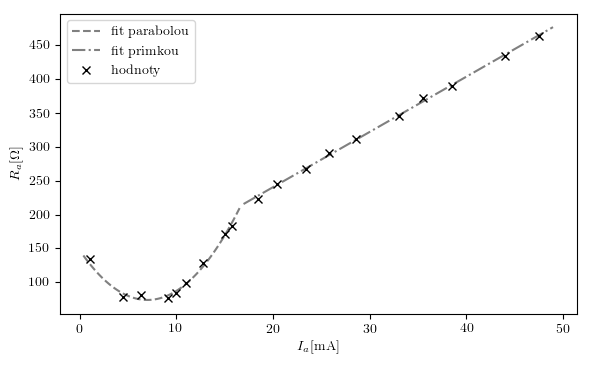

In [169]:
mA_a_nom = unumpy.nominal_values(df_a.mA.values)
R_korig_a_nom = unumpy.nominal_values(R_korig_a)
R_a_nom = unumpy.nominal_values(R_a)

parafit = fit(parabola, mA_a_nom[:9], R_a_nom[:9], sigma=unumpy.std_devs(R_a)[:9], absolute_sigma=True)
primfit = fit(primka, mA_a_nom[9:], R_a_nom[9:])

plt.plot(*curve(mA_a_nom[:9], parabola, parafit[0]), "--", c="gray", label="fit parabolou")
plt.plot(*curve(mA_a_nom[9:], primka, primfit[0]), "-.", c="gray", label="fit primkou")
# plt.plot(mA_a_nom, R_korig_a_nom, "+", label="korig")
plt.plot(mA_a_nom, R_a_nom, "kx", label="hodnoty")
plt.xlabel("$I_a [$mA$]$")
plt.ylabel("$R_a [\\Omega]$")
plt.legend()
plt.tight_layout()
plt.savefig("../plot/u1_a2.pdf")

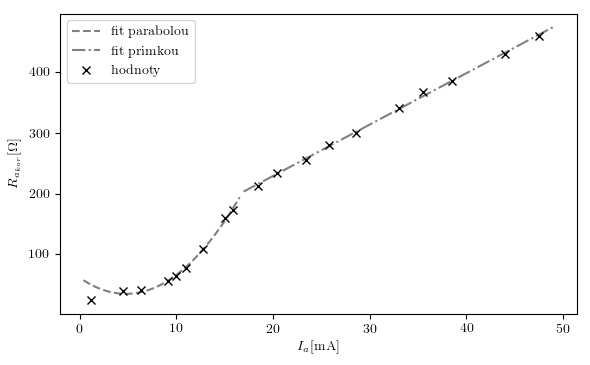

In [170]:
mA_a_nom = unumpy.nominal_values(df_a.mA.values)
R_korig_a_nom = unumpy.nominal_values(R_korig_a)
R_a_nom = unumpy.nominal_values(R_a)

parafit = fit(parabola, mA_a_nom[:9], R_korig_a_nom[:9], sigma=unumpy.std_devs(R_korig_a)[:9], absolute_sigma=True)
primfit = fit(primka, mA_a_nom[9:], R_korig_a_nom[9:])

plt.plot(*curve(mA_a_nom[:9], parabola, parafit[0]), "--", c="gray", label="fit parabolou")
plt.plot(*curve(mA_a_nom[9:], primka, primfit[0]), "-.", c="gray", label="fit primkou")
# plt.plot(mA_a_nom, R_korig_a_nom, "+", label="korig")
plt.plot(mA_a_nom, R_korig_a_nom, "kx", label="hodnoty")
plt.xlabel("$I_a [$mA$]$")
plt.ylabel("$R_{a_{kor}} [\\Omega]$")
plt.legend()
plt.tight_layout()
plt.savefig("../plot/u1_a_kor2.pdf")

#### B

In [175]:
df_b

,V,rozV,mA,rozmA
0,0.1500+/-0.0030,1.5,2.410+/-0.006,3.0
1,0.2800+/-0.0030,1.5,6.100+/-0.015,7.5
2,0.3900+/-0.0030,1.5,7.900+/-0.030,15.0
3,0.5000+/-0.0030,1.5,9.400+/-0.030,15.0
4,0.7000+/-0.0030,1.5,11.200+/-0.030,15.0
5,0.9000+/-0.0030,1.5,12.400+/-0.030,15.0
6,1.1000+/-0.0030,1.5,13.400+/-0.030,15.0
7,2.000+/-0.006,3.0,15.20+/-0.06,30.0
8,3.000+/-0.006,3.0,18.40+/-0.06,30.0
9,4.000+/-0.015,7.5,19.80+/-0.06,30.0


In [174]:
df_b["V"] = sp.array([ufloat(df_b.iloc[i].V, df_b.iloc[i].rozV * 0.002) for i in range(len(df_b))])

In [176]:
R_b = [df_b.iloc[i].V / (df_b.iloc[i].mA * 0.001) for i in range(len(df_b))]
for r in R_b:
    print(r)

62.2+/-1.3
45.9+/-0.5
49.4+/-0.4
53.2+/-0.4
62.50+/-0.32
72.58+/-0.30
82.09+/-0.29
131.6+/-0.7
163.0+/-0.6
202.0+/-1.0
223.2+/-0.9
240.0+/-0.8
260.9+/-0.8
288.6+/-1.2
346.7+/-1.6
365.4+/-1.5
417.6+/-1.9
444.9+/-1.8


In [182]:
R_korig_b = [odpor_voltmetru[df_b.iloc[i].rozV] * df_b.iloc[i].V / ( odpor_voltmetru[df_b.iloc[i].rozV] * df_b.iloc[i].mA * 0.001 - df_b.iloc[i].V) for i in range(len(df_b))]
for r in R_korig_b:
    print(r)

67.7+/-1.5
48.8+/-0.6
52.7+/-0.5
57.1+/-0.4
68.0+/-0.4
80.1+/-0.4
91.9+/-0.4
144.2+/-0.8
182.9+/-0.9
213.5+/-1.1
237.3+/-1.0
256.4+/-1.0
280.4+/-0.9
300.2+/-1.3
363.5+/-1.8
384.2+/-1.7
429.6+/-2.0
458.5+/-1.9


In [185]:
I_b_korig = [df_b.iloc[i].mA * 0.001 + df_b.iloc[i].V / odpor_voltmetru[df_b.iloc[i].rozV] for i in range(len(df_b))]
I_b_korig = [a * 1000 for a in I_b_korig]
I_b_korig

[2.604805194805195+/-0.007434783082172875,
 6.463636363636363+/-0.015951589666279502,
 8.406493506493508+/-0.030706206428000798,
 10.04935064935065+/-0.03099507850018904,
 12.10909090909091+/-0.0316921054250105,
 13.568831168831169+/-0.03259829882554372,
 14.82857142857143+/-0.03369678784960485,
 16.533333333333335+/-0.06652132304572035,
 20.400000000000002+/-0.07373224833439196,
 20.866666666666667+/-0.061792164591785194,
 23.73333333333333+/-0.06270605539113466,
 26.6+/-0.06380525927469546,
 29.520000000000003+/-0.06535564244960032,
 30.949732620320855+/-0.06137827127171142,
 39.2379679144385+/-0.151200513920534,
 42.47860962566845+/-0.1515384406745143,
 46.769205076820306+/-0.1505222670016948,
 50.4562458249833+/-0.15067029464407689]

In [197]:
for i in R_korig_b:
    print(i)

67.7+/-1.5
48.8+/-0.6
52.7+/-0.5
57.1+/-0.4
68.0+/-0.4
80.1+/-0.4
91.9+/-0.4
144.2+/-0.8
182.9+/-0.9
213.5+/-1.1
237.3+/-1.0
256.4+/-1.0
280.4+/-0.9
300.2+/-1.3
363.5+/-1.8
384.2+/-1.7
429.6+/-2.0
458.5+/-1.9


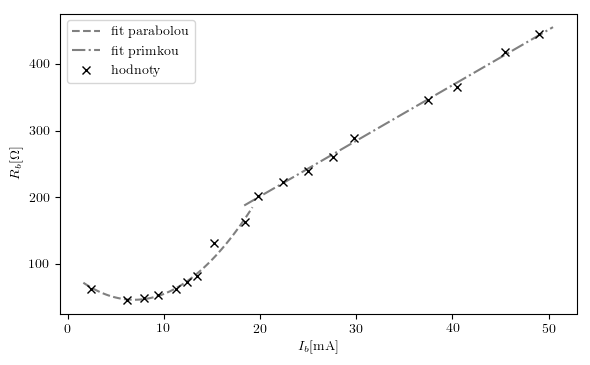

In [190]:
mA_b_nom = unumpy.nominal_values(df_b.mA.values)
R_korig_b_nom = unumpy.nominal_values(R_korig_b)
R_b_nom = unumpy.nominal_values(R_b)

parafit = fit(parabola, mA_b_nom[:9], R_b_nom[:9], sigma=unumpy.std_devs(R_b)[:9], absolute_sigma=True)
primfit = fit(primka, mA_b_nom[9:], R_b_nom[9:])

plt.plot(*curve(mA_b_nom[:9], parabola, parafit[0]), "--", c="gray", label="fit parabolou")
plt.plot(*curve(mA_b_nom[9:], primka, primfit[0]), "-.", c="gray", label="fit přímkou")
# plt.plot(mA_a_nom, R_korig_a_nom, "+", label="korig")
plt.plot(mA_b_nom, R_b_nom, "kx", label="hodnoty")
plt.xlabel("$I_b [$mA$]$")
plt.ylabel("$R_b [\\Omega]$")
plt.legend()
plt.tight_layout()
#plt.savefig("../plot/u1_b.pdf")

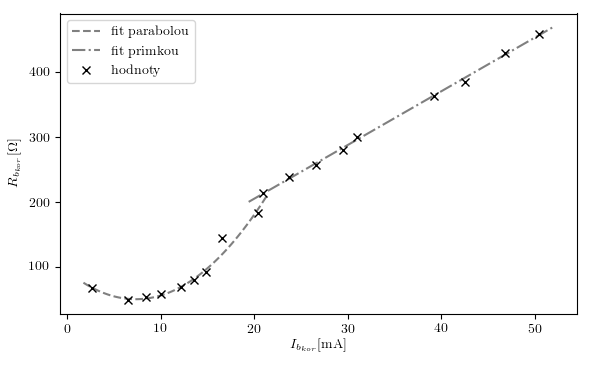

In [192]:
mA_b_nom = unumpy.nominal_values(df_b.mA.values)
R_korig_b_nom = unumpy.nominal_values(R_korig_b)
R_b_nom = unumpy.nominal_values(R_b)
I_b_korig_nom = unumpy.nominal_values(I_b_korig)

parafit = fit(parabola, I_b_korig_nom[:9], R_korig_b_nom[:9], sigma=unumpy.std_devs(R_korig_b)[:9], absolute_sigma=True)
primfit = fit(primka, I_b_korig_nom[9:], R_korig_b_nom[9:])

plt.plot(*curve(I_b_korig_nom[:9], parabola, parafit[0]), "--", c="gray", label="fit parabolou")
plt.plot(*curve(I_b_korig_nom[9:], primka, primfit[0]), "-.", c="gray", label="fit přímkou")
# plt.plot(mA_a_nom, R_korig_a_nom, "+", label="korig")
plt.plot(I_b_korig_nom, R_korig_b_nom, "kx", label="hodnoty")
plt.xlabel("$I_{b_{kor}} [$mA$]$")
plt.ylabel("$R_{b_{kor}} [\\Omega]$")
plt.legend()
plt.tight_layout()
#plt.savefig("../plot/u1_b_kor.pdf")

### Úkol 2

In [53]:
odpory_voltmetru = sp.array([770, 1500, 3750, 7480, 14970])
odpory_ampermetru = sp.array([110.2, 82.9, 39.8, 21.1, 10.9, 4.5])

In [54]:
odpory_ampermetru * 0.008 + 0.4

array([ 1.2816,  1.0632,  0.7184,  0.5688,  0.4872,  0.436 ])

In [56]:
odpory_voltmetru * 0.008 + 20

array([  26.16,   32.  ,   50.  ,   79.84,  139.76])

## Úkol 3

In [24]:
df_u3 = pd.read_excel("../raw/substitucni_metoda.xlsx")

In [25]:
df_u3.I[0:1] = df_u3.I[0:1].apply(lambda h: ufloat(h, 0.002*1.5))
df_u3.I[1:3] = df_u3.I[1:3].apply(lambda h: ufloat(h, 0.002*3))
df_u3.I[3:6] = df_u3.I[3:6].apply(lambda h: ufloat(h, 0.002*7.5))
df_u3.I[6:10] = df_u3.I[6:10].apply(lambda h: ufloat(h, 0.002*15))
df_u3.I[10:13] = df_u3.I[10:13].apply(lambda h: ufloat(h, 0.002*30))
df_u3.I[13:] = df_u3.I[13:].apply(lambda h: ufloat(h, 0.002*75))

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\tools\Anaconda3\lib\site-packages\ipykernel_

In [27]:
df_u3.R = df_u3.R.apply(lambda h: ufloat(h, 0.001*h))

In [28]:
df_u3

,I,R
0,0.9800+/-0.0030,42.40+/-0.04
1,1.980+/-0.006,42.40+/-0.04
2,2.800+/-0.006,43.40+/-0.04
3,4.100+/-0.015,45.00+/-0.04
4,4.950+/-0.015,46.20+/-0.05
5,6.900+/-0.015,50.10+/-0.05
6,9.100+/-0.030,59.00+/-0.06
7,10.900+/-0.030,76.00+/-0.08
8,13.100+/-0.030,121.00+/-0.12
9,15.000+/-0.030,158.00+/-0.16


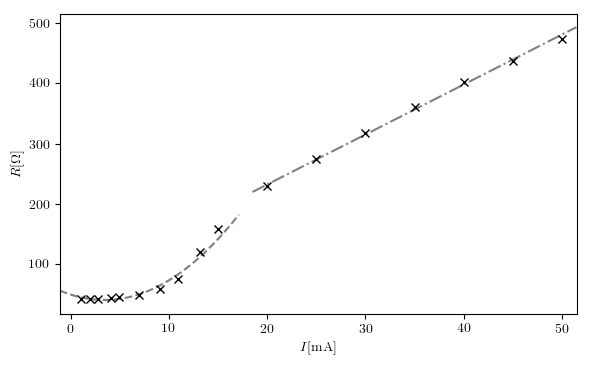

In [65]:
parafit = fit(parabola, noms(df_u3.I[:10]), noms(df_u3.R[:10]), sigma=stds(df_u3.R[:10]), absolute_sigma=True)
primfit = fit(primka, noms(df_u3.I[10:]), noms(df_u3.R[10:]), sigma=stds(df_u3.R[10:]), absolute_sigma=True)

fig = plt.figure()
ax = plt.axes()

ax.plot(*curve(noms(df_u3.I[:10]), parabola, parafit[0], overrun=0.15), "--", c="gray", label="fit parabolou")
ax.plot(*curve(noms(df_u3.I[10:]), primka, primfit[0]), "-.", c="gray", label="fit primkou")

ax.plot(noms(df_u3.I), noms(df_u3.R), "kx")

ax.set_xlabel("$I[\si{mA}]$")
ax.set_ylabel("$R[\si{\ohm}]$")
ax.margins(x=0)

fig.tight_layout()
fig.savefig("../plot/u3.pdf")

## Úkol 5

In [51]:
df_u3["U"] = df_u3.I * df_u3.R *1e-3

In [53]:
df_u3["P"] = df_u3.U * df_u3.I * 1e-3

In [54]:
df_u3

,I,R,U,P
0,0.9800+/-0.0030,42.40+/-0.04,0.04155+/-0.00013,(4.072+/-0.025)e-05
1,1.980+/-0.006,42.40+/-0.04,0.08395+/-0.00027,0.0001662+/-0.0000010
2,2.800+/-0.006,43.40+/-0.04,0.12152+/-0.00029,0.0003403+/-0.0000015
3,4.100+/-0.015,45.00+/-0.04,0.1845+/-0.0007,0.000756+/-0.000006
4,4.950+/-0.015,46.20+/-0.05,0.2287+/-0.0007,0.001132+/-0.000007
5,6.900+/-0.015,50.10+/-0.05,0.3457+/-0.0008,0.002385+/-0.000011
6,9.100+/-0.030,59.00+/-0.06,0.5369+/-0.0018,0.004886+/-0.000033
7,10.900+/-0.030,76.00+/-0.08,0.8284+/-0.0024,0.00903+/-0.00005
8,13.100+/-0.030,121.00+/-0.12,1.585+/-0.004,0.02076+/-0.00010
9,15.000+/-0.030,158.00+/-0.16,2.370+/-0.005,0.03555+/-0.00015


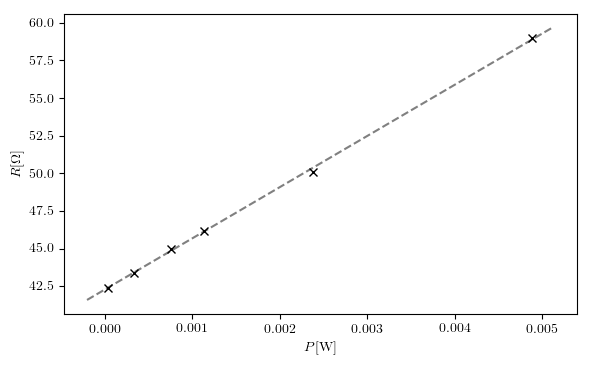

In [78]:
aP = list(df_u3.P[0:1].values) + list(df_u3.P[2:7].values)
aR = list(df_u3.R[0:1].values) + list(df_u3.R[2:7].values)

params, errs = fit(primka, noms(aP), noms(aR), sigma=stds(aR))

fig = plt.figure()
ax = plt.axes()

ax.plot(*curve(noms(aP), primka, params), "--", c="gray")
ax.plot(noms(aP), noms(aR), "kx")

ax.set_xlabel("$P[\si{\watt}]$")
ax.set_ylabel("$R[\si{\ohm}]$")

fig.tight_layout()
fig.savefig("../plot/u5.pdf")

In [73]:
R_0 = ufloat(params[1], errs[1])

In [74]:
print(R_0)

42.35+/-0.09


In [79]:
R_multi = ufloat(43.03, 43.03 * 0.005 + 0.1)

In [80]:
R_multi

43.03+/-0.31515000000000004